# Proyecto Detección de objetos en el mar

In [3]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import *

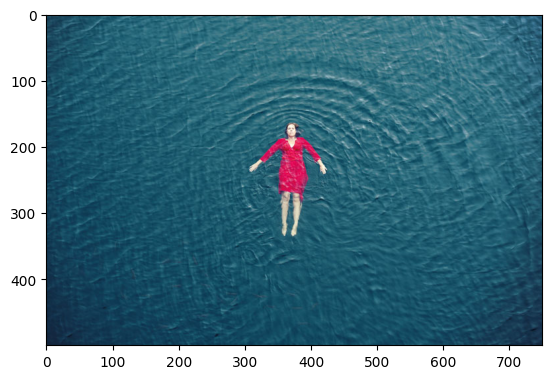

In [4]:
img = plt.imread('./Imagenes/prueba9.jpg')
plt.imshow(img)

def show2imgs(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    plt.show()

Escala de grises

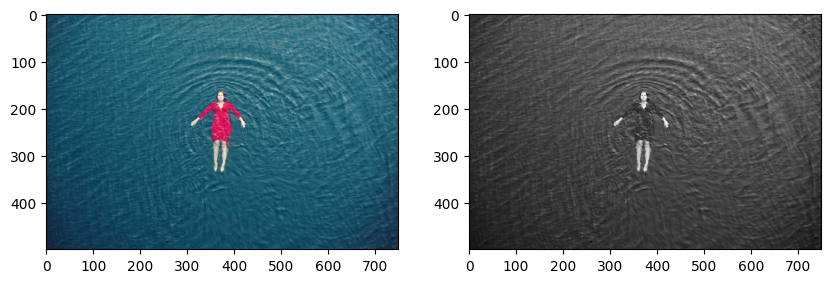

In [5]:
from skimage import exposure
from skimage import color
img_gray = color.rgb2gray(img)
show2imgs(img, img_gray)

# img_gray = ski.color.rgb2gray(img)
# eq_adapt = exposure.equalize_adapthist(img_gray)
# show2imgs(img_gray, eq_adapt)

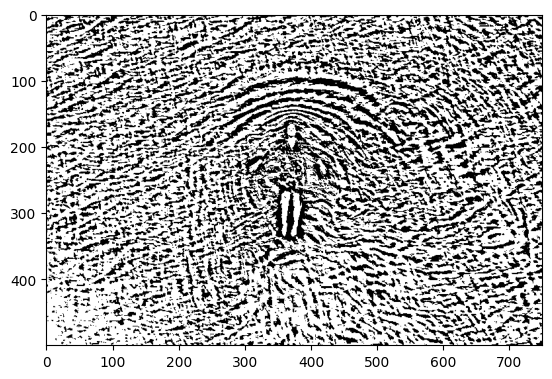

In [6]:
thresh = ski.filters.threshold_local(img_gray,35, offset=0.015)
binary = img_gray > thresh

plt.imshow(binary, cmap='gray')

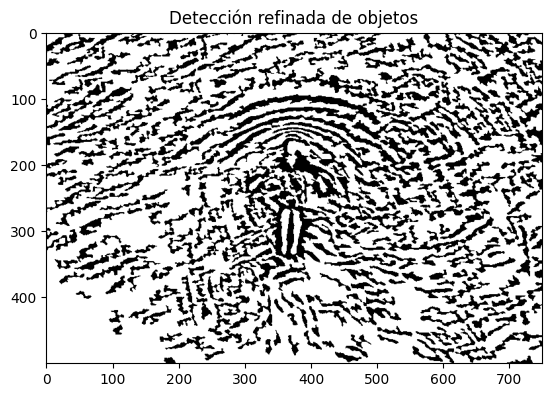

In [7]:
from skimage import filters, morphology

# Aplicamos un suavizado Gaussiano para reducir el ruido
img_smooth = filters.gaussian(img_gray, sigma=1)

# Threshold adaptativo (puedes ajustar el tamaño del bloque y el offset según sea necesario)
thresh = filters.threshold_local(img_smooth, block_size=35, offset=0.01)
binary = img_smooth > thresh

# Eliminación de objetos pequeños que no son de interés (como el agua)
cleaned_binary = morphology.remove_small_objects(binary, min_size=100)

# Opcional: eliminar pequeños huecos dentro de los objetos detectados
cleaned_binary = morphology.remove_small_holes(cleaned_binary, area_threshold=100)

# Mostramos el resultado
plt.imshow(cleaned_binary, cmap='gray')
plt.title("Detección refinada de objetos")
plt.show()


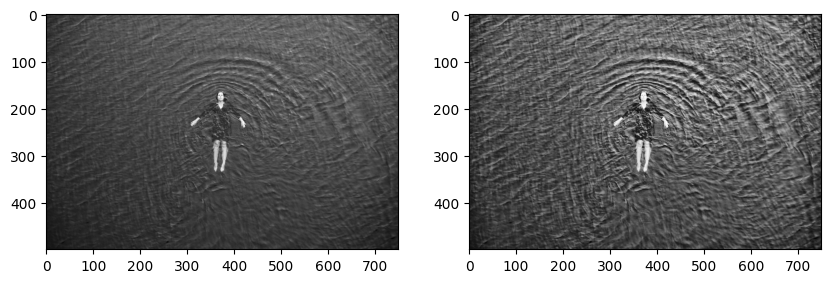

In [8]:
from skimage import exposure
eq_adapt = exposure.equalize_adapthist(img_gray)
show2imgs(img_gray, eq_adapt)

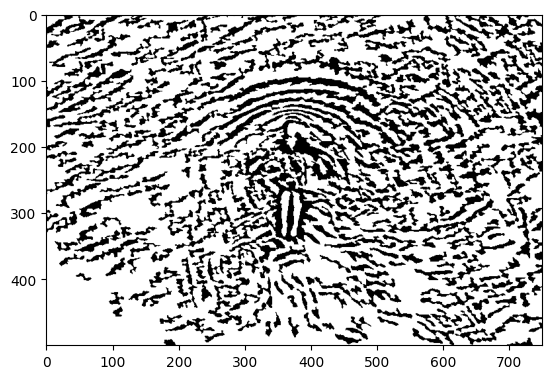

In [9]:
cleaned = ski.morphology.remove_small_objects(binary.astype(bool), min_size=100)
cleaned = ski.morphology.remove_small_holes(cleaned, area_threshold=100)
plt.imshow(cleaned, cmap='gray')

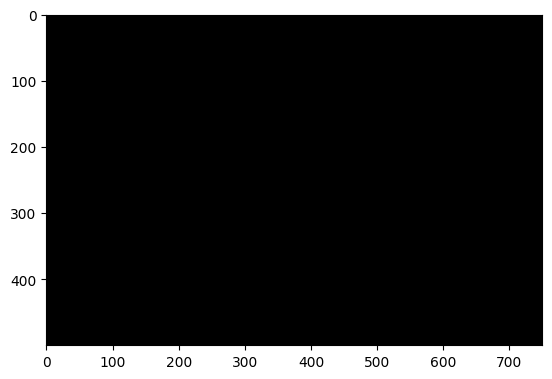

In [10]:
labeled = ski.measure.label(cleaned)
props = ski.measure.regionprops(labeled)

pen_mask = np.zeros_like(binary)
for prop in props:
    if prop.area > 1000 and prop.eccentricity > 0.99:  # Ajustar estos valores
        pen_mask[prop.coords[:, 0], prop.coords[:, 1]] = 1

plt.imshow(pen_mask, cmap='gray')

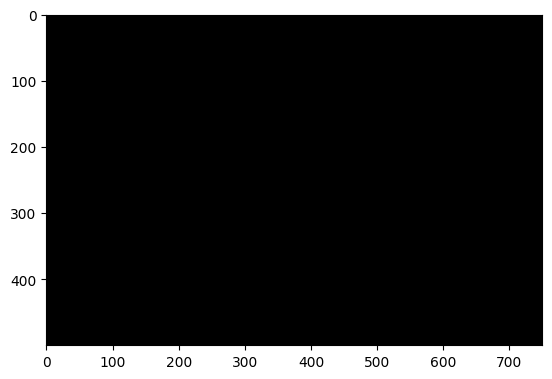

In [11]:
result = img_gray * pen_mask
plt.imshow(result, cmap='gray')

In [12]:
num_channels = img.shape[2]

# Aplicar la máscara y forzar fondo negro si es necesario
resultado = img.copy()
resultado[:, :, :num_channels] = np.multiply(img[:, :, :num_channels], np.dstack([pen_mask]))
resultado[:, :, 3] = 1 #Alpa a 1 es negro

# Mostrar el resultado

show2imgs(img,resultado)

IndexError: index 3 is out of bounds for axis 2 with size 3